In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [69]:
# the supplied CSV data files are in the data/raw directory
meter_data = pd.read_csv('../data/raw/train.csv')
building_metadata=pd.read_csv('../data/raw/building_metadata.csv')
weather_data=pd.read_csv('../data/raw/weather_train.csv')

In [70]:
columns_to_search=['timestamp','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr',
                   'sea_level_pressure','wind_direction','wind_speed']
duplicate_rows = weather_data[weather_data.duplicated(columns_to_search,keep=False)]
duplicate_rows['site_id'].unique()

array([ 0,  7,  8, 11], dtype=int64)

Now that I have found these duplicates, I need to remove them from the weather data, and in the building_metadata, for those with site_id = 11 replace with 7, and those with site_id 8 replace with 0. How does this affect my data? type of buildings change in each site, just that distribution changes 

In [71]:
building_metadata.replace({'site_id': {11: 7, 8: 0}},inplace=True)

In [72]:
building_metadata[(building_metadata['site_id'] == 8) | (building_metadata['site_id'] == 11)]

,site_id,building_id,primary_use,square_feet,year_built,floor_count


In [75]:
weather_data = weather_data[(weather_data['site_id'] != 8) & (weather_data['site_id'] != 11)]

In [76]:
weather_data[(weather_data['site_id'] == 8) | (weather_data['site_id'] == 11)]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed


In [77]:
corrected_values=meter_data[meter_data['meter']==1]['meter_reading']*0.2931
meter_data.loc[meter_data['meter']==1,'meter_reading']=corrected_values
meter_data[meter_data['meter']==1]['meter_reading'].head()

172     0.000000
174     0.000000
176     1.340024
181    61.517587
184     0.000000
Name: meter_reading, dtype: float64

In [78]:
weather_data.precip_depth_1_hr.loc[weather_data['precip_depth_1_hr']==-1] = np.nan

In [79]:
meter_data['meter_reading_log']=np.log(meter_data['meter_reading']+1)
weather_data['precip_depth_1_hr_log']=np.log(weather_data['precip_depth_1_hr']+1)
weather_data['cloud_coverage_log']=np.log(weather_data['cloud_coverage']+1)
weather_data['wind_speed_log']=np.log(weather_data['wind_speed']+1)
building_metadata['floor_count_log']=np.log(building_metadata['floor_count'])
building_metadata['square_feet_log']=np.log(building_metadata['square_feet'])

In [80]:
building_and_meter_data=meter_data.merge(building_metadata,on='building_id')

In [81]:
all_data=building_and_meter_data.merge(weather_data, on=['timestamp','site_id'])

In [82]:
all_data.head()

,building_id,meter,timestamp,meter_reading,meter_reading_log,site_id,primary_use,square_feet,year_built,floor_count,...,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,precip_depth_1_hr_log,cloud_coverage_log,wind_speed_log
0,0,0,2016-01-01 00:00:00,0.0,0.0,0,Education,7432,2008.0,NaN,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.94591,0.0
1,1,0,2016-01-01 00:00:00,0.0,0.0,0,Education,2720,2004.0,NaN,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.94591,0.0
2,2,0,2016-01-01 00:00:00,0.0,0.0,0,Education,5376,1991.0,NaN,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.94591,0.0
3,3,0,2016-01-01 00:00:00,0.0,0.0,0,Education,23685,2002.0,NaN,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.94591,0.0
4,4,0,2016-01-01 00:00:00,0.0,0.0,0,Education,116607,1975.0,NaN,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.94591,0.0


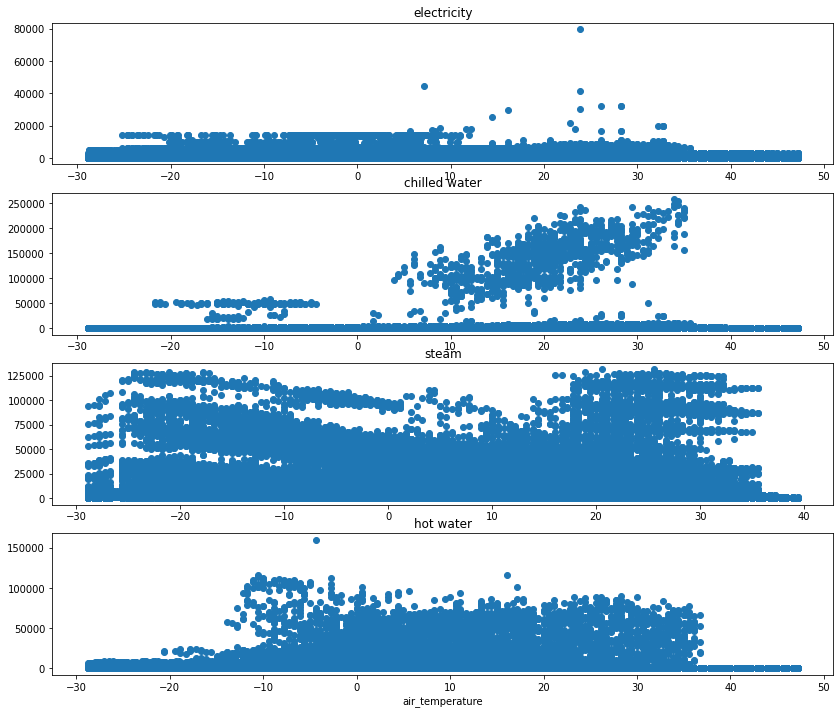

In [83]:
fid, ax = plt.subplots(4,1,figsize=(14,12))
all_data_meter_0=all_data[all_data['meter']==0]
all_data_meter_1=all_data[all_data['meter']==1]
all_data_meter_2=all_data[(all_data['meter']==2) & (all_data['building_id']!= 1099)]
all_data_meter_3=all_data[all_data['meter']==3]
ax[0].scatter(all_data_meter_0['air_temperature'],all_data_meter_0['meter_reading'])
ax[1].scatter(all_data_meter_1['air_temperature'],all_data_meter_1['meter_reading'])
ax[2].scatter(all_data_meter_2['air_temperature'],all_data_meter_2['meter_reading'])
ax[3].scatter(all_data_meter_3['air_temperature'],all_data_meter_3['meter_reading'])
ax[0].set_title('electricity')
ax[1].set_title('chilled water')
ax[2].set_title('steam')
ax[3].set_title('hot water')
ax[3].set_xlabel('air_temperature')
plt.show()

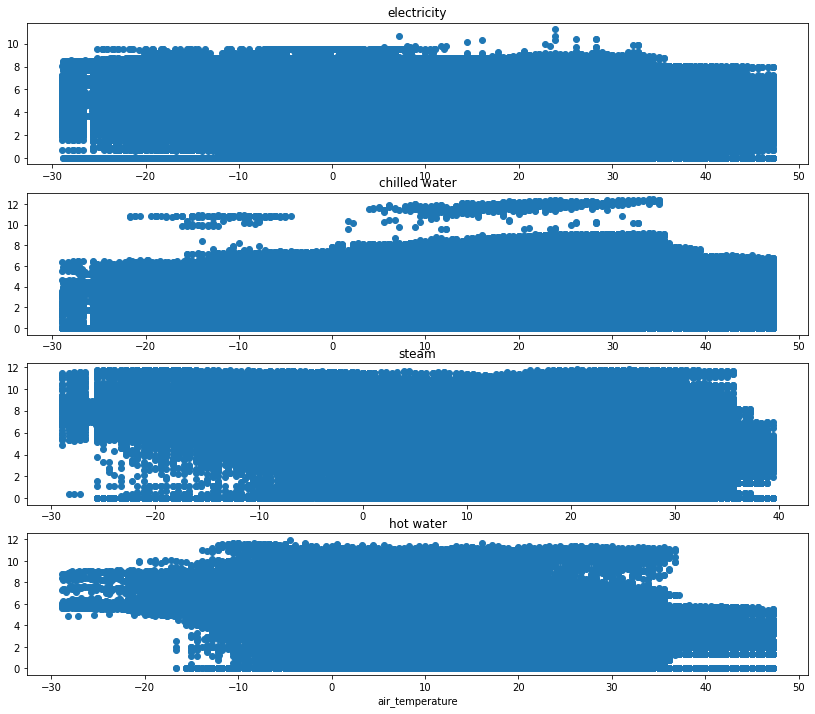

In [84]:
fid, ax = plt.subplots(4,1,figsize=(14,12))
all_data_meter_0=all_data[all_data['meter']==0]
all_data_meter_1=all_data[all_data['meter']==1]
all_data_meter_2=all_data[(all_data['meter']==2) & (all_data['building_id']!= 1099)]
all_data_meter_3=all_data[all_data['meter']==3]
ax[0].scatter(all_data_meter_0['air_temperature'],all_data_meter_0['meter_reading_log'])
ax[1].scatter(all_data_meter_1['air_temperature'],all_data_meter_1['meter_reading_log'])
ax[2].scatter(all_data_meter_2['air_temperature'],all_data_meter_2['meter_reading_log'])
ax[3].scatter(all_data_meter_3['air_temperature'],all_data_meter_3['meter_reading_log'])
ax[0].set_title('electricity')
ax[1].set_title('chilled water')
ax[2].set_title('steam')
ax[3].set_title('hot water')
ax[3].set_xlabel('air_temperature')
plt.show()

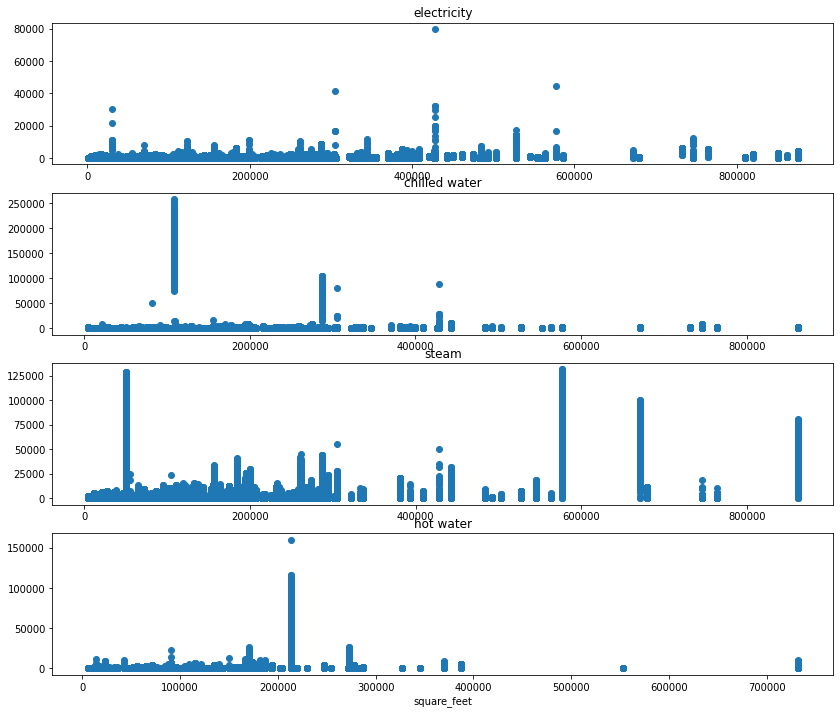

In [85]:
fig, ax = plt.subplots(4,1,figsize=(14,12))
all_data_meter_0=all_data[all_data['meter']==0]
all_data_meter_1=all_data[all_data['meter']==1]
all_data_meter_2=all_data[(all_data['meter']==2) & (all_data['building_id']!= 1099)]
all_data_meter_3=all_data[all_data['meter']==3]
ax[0].scatter(all_data_meter_0['square_feet'],all_data_meter_0['meter_reading'])
ax[1].scatter(all_data_meter_1['square_feet'],all_data_meter_1['meter_reading'])
ax[2].scatter(all_data_meter_2['square_feet'],all_data_meter_2['meter_reading'])
ax[3].scatter(all_data_meter_3['square_feet'],all_data_meter_3['meter_reading'])
ax[0].set_title('electricity')
ax[1].set_title('chilled water')
ax[2].set_title('steam')
ax[3].set_title('hot water')
ax[3].set_xlabel('square_feet')
plt.show()

here we observe that hot water is more used by smaller buildings? or is it that this data is missing?

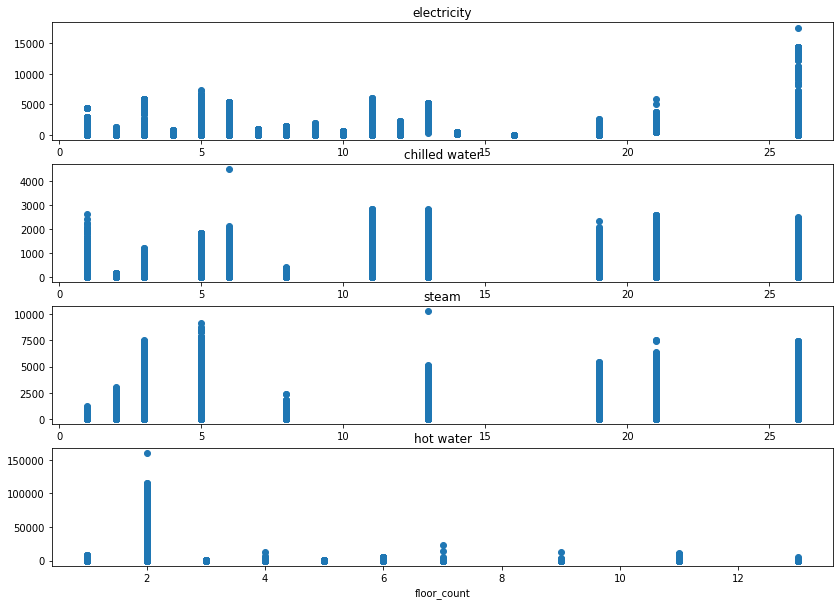

In [86]:
fig, ax = plt.subplots(4,1,figsize=(14,10))
all_data_meter_0=all_data[all_data['meter']==0]
all_data_meter_1=all_data[all_data['meter']==1]
all_data_meter_2=all_data[(all_data['meter']==2) & (all_data['building_id']!= 1099)]
all_data_meter_3=all_data[all_data['meter']==3]
ax[0].scatter(all_data_meter_0['floor_count'],all_data_meter_0['meter_reading'])
ax[1].scatter(all_data_meter_1['floor_count'],all_data_meter_1['meter_reading'])
ax[2].scatter(all_data_meter_2['floor_count'],all_data_meter_2['meter_reading'])
ax[3].scatter(all_data_meter_3['floor_count'],all_data_meter_3['meter_reading'])
ax[0].set_title('electricity')
ax[1].set_title('chilled water')
ax[2].set_title('steam')
ax[3].set_title('hot water')
ax[3].set_xlabel('floor_count')
plt.show()

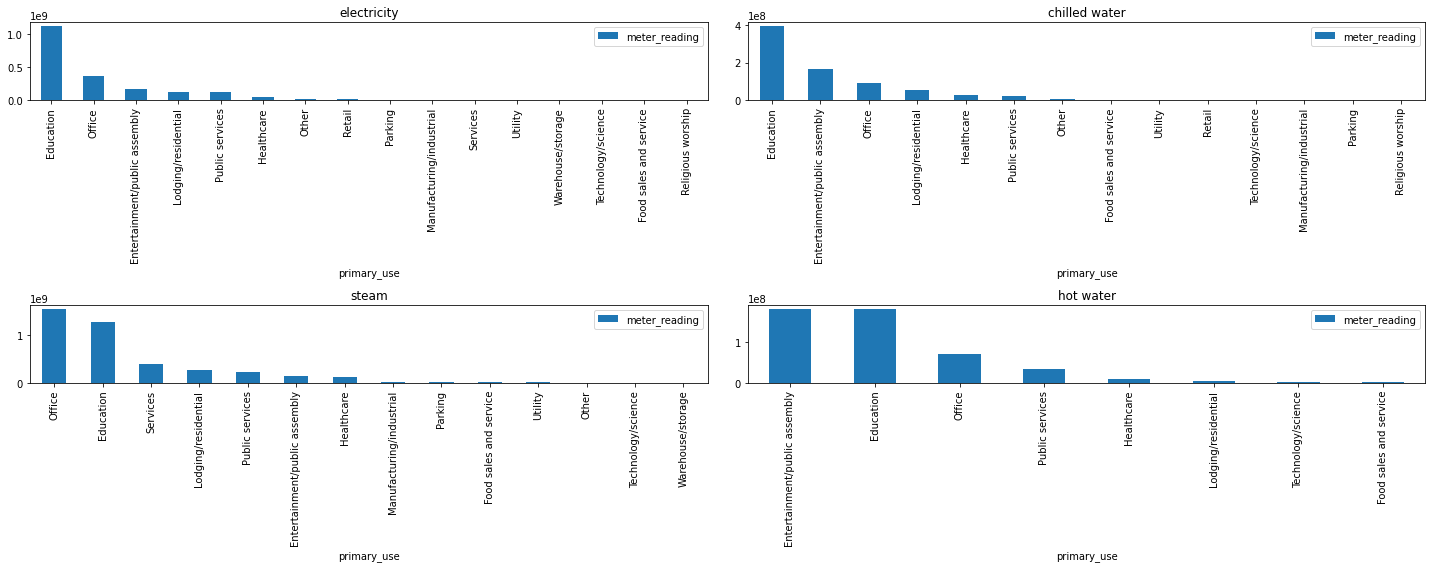

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(20,8))
all_data_meter_0.groupby('primary_use').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[0,0])
all_data_meter_1.groupby('primary_use').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[0,1])
all_data_meter_2.groupby('primary_use').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[1,0])
all_data_meter_3.groupby('primary_use').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[1,1])
ax[0,0].set_title('electricity')
ax[0,1].set_title('chilled water')
ax[1,0].set_title('steam')
ax[1,1].set_title('hot water')
plt.tight_layout()
plt.show()

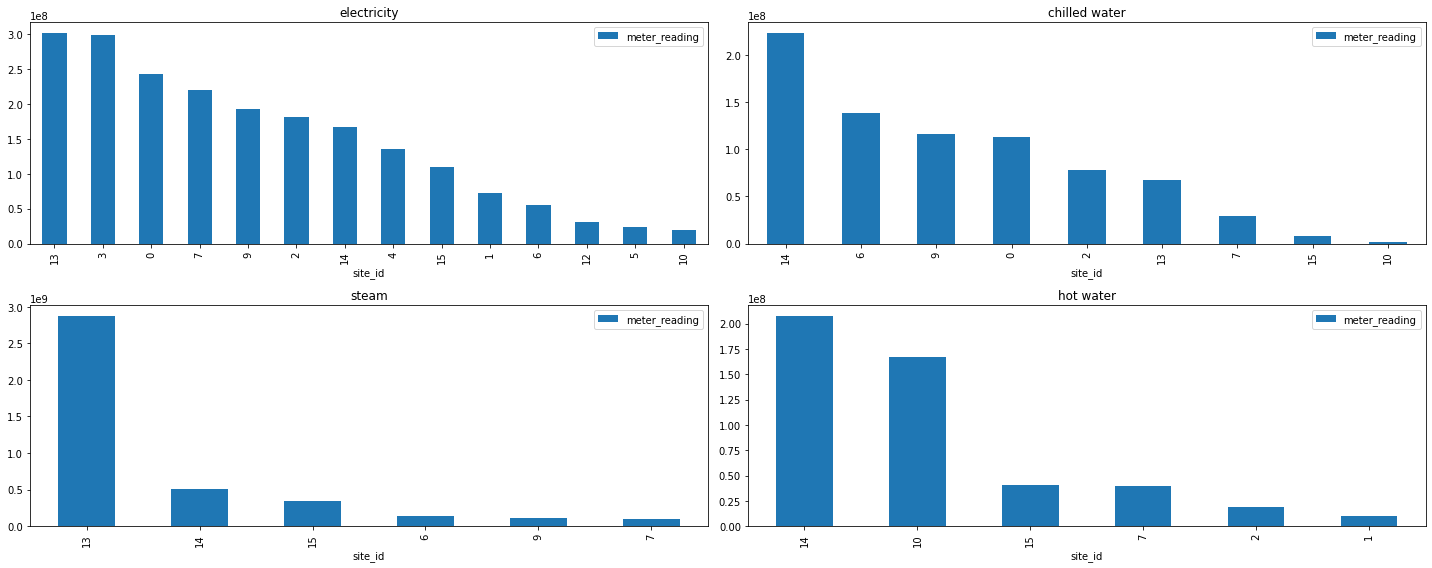

In [88]:
fig, ax = plt.subplots(2, 2, figsize=(20,8))
all_data_meter_0.groupby('site_id').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[0,0])
all_data_meter_1.groupby('site_id').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[0,1])
all_data_meter_2.groupby('site_id').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[1,0])
all_data_meter_3.groupby('site_id').sum().sort_values(by='meter_reading',ascending=False).plot(use_index=True,y='meter_reading',kind='bar',ax=ax[1,1])
ax[0,0].set_title('electricity')
ax[0,1].set_title('chilled water')
ax[1,0].set_title('steam')
ax[1,1].set_title('hot water')
plt.tight_layout()
plt.show()

In [100]:
categ_data_meter_0=all_data_meter_0[['timestamp','meter','building_id','site_id','primary_use']]
#num_data_meter_0=all_data_meter_0.drop(['timestamp','meter','building_id','site_id','primary_use'], axis=1)
data_meter_0=all_data_meter_0[['site_id','building_id','primary_use','meter','timestamp','meter_reading','meter_reading_log','square_feet','year_built','floor_count',
                                   'air_temperature','dew_temperature','cloud_coverage','precip_depth_1_hr',
                                   'sea_level_pressure','wind_direction','wind_speed']]
data_meter_0.head()

,site_id,building_id,primary_use,meter,timestamp,meter_reading,meter_reading_log,square_feet,year_built,floor_count,air_temperature,dew_temperature,cloud_coverage,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,0,2016-01-01 00:00:00,0.0,0.0,7432,2008.0,NaN,25.0,20.0,6.0,NaN,1019.7,0.0,0.0
1,0,1,Education,0,2016-01-01 00:00:00,0.0,0.0,2720,2004.0,NaN,25.0,20.0,6.0,NaN,1019.7,0.0,0.0
2,0,2,Education,0,2016-01-01 00:00:00,0.0,0.0,5376,1991.0,NaN,25.0,20.0,6.0,NaN,1019.7,0.0,0.0
3,0,3,Education,0,2016-01-01 00:00:00,0.0,0.0,23685,2002.0,NaN,25.0,20.0,6.0,NaN,1019.7,0.0,0.0
4,0,4,Education,0,2016-01-01 00:00:00,0.0,0.0,116607,1975.0,NaN,25.0,20.0,6.0,NaN,1019.7,0.0,0.0


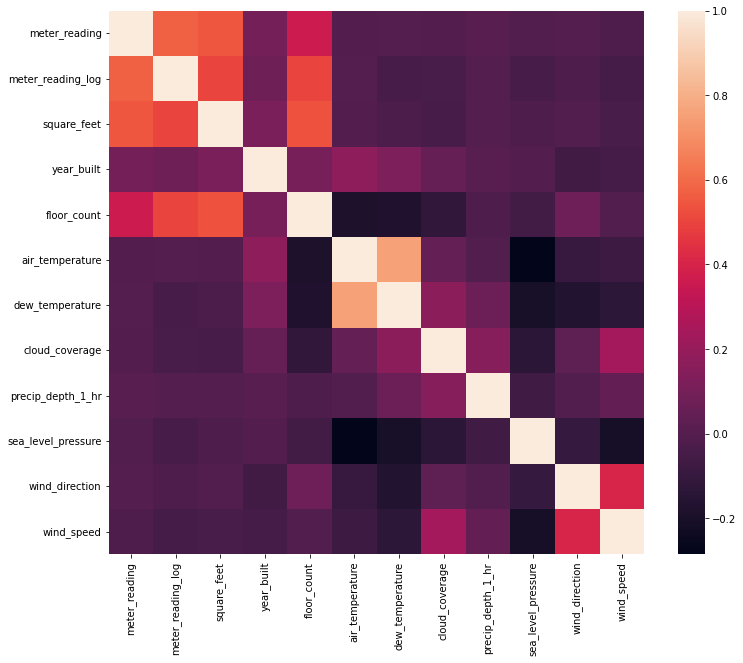

In [94]:
plt.subplots(figsize=(12,10))
sns.heatmap(num_data_meter_0.corr());

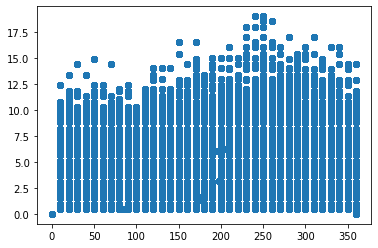

In [98]:
plt.scatter(num_data_meter_0['wind_direction'],num_data_meter_0['wind_speed'])

In [101]:
data_meter_0.to_csv('data_meter_0.csv')